# Pizza Price Prediction (Playground Data)

This dataset I made is for predicting the prices of pizza, the dataset is not complete at all, but you can use this dataset for learning or study or maybe you want to upgrade the data by yourself, is okay for me, hopefully, this dataset is useful for you guys, and use this dataset wisely.

https://www.kaggle.com/datasets/knightbearr/pizza-price-prediction?resource=download

Github link: Pizza Price Dataset <https://github.com/knightbearr/Guessing-Prices-Pizza>

Notebook: Pizza Price Prediction V.2.0 <https://www.kaggle.com/knightbearr/pizza-price-prediction-xgb-knightbearr>

Web Application: Pizza Price Prediction Web Application <https://share.streamlit.io/knightbearr/pizza-price-prediction-web-application/main/main.py>

If you want to know version 1 of my pizza dataset, you can see version 5 in my notebook, thanks in advance!

## 1.1 Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('pizza_v1.csv')
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


## 1.2 Pré processamento dos dados

In [4]:
# Remover "Rp" e a vísgula da coluna "price_rupiah"
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp', '').str.replace(',', '')

In [5]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no


In [7]:
# Verificar os número de valores únicos no tipo de dados do objeto
df.select_dtypes(include='object').nunique()

company          5
price_rupiah    43
topping         12
variant         20
size             6
extra_sauce      2
extra_cheese     2
dtype: int64

In [8]:
# converter a coluna "Valor" para inteiro
df['price_rupiah'] = df['price_rupiah'].astype(int)

## 1.3 Variações de Segmento de Pizza

In [9]:
df.variant.unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

In [10]:
# definir função para segmentar nomes de pizza em tipos
def segment_variant(variant):
    if 'veggie' in variant:
        return 'Vegetarian'
    elif 'meat' in variant or 'BBQ' in variant:
        return 'Meat'
    elif 'tuna' in variant:
        return 'Seafood'
    else:
        return 'Other'

#aplique a função à coluna 'Pizza Name' para criar uma nova coluna 'Pizza Type'
df['variant'] = df['variant'].apply(segment_variant)

<Axes: >

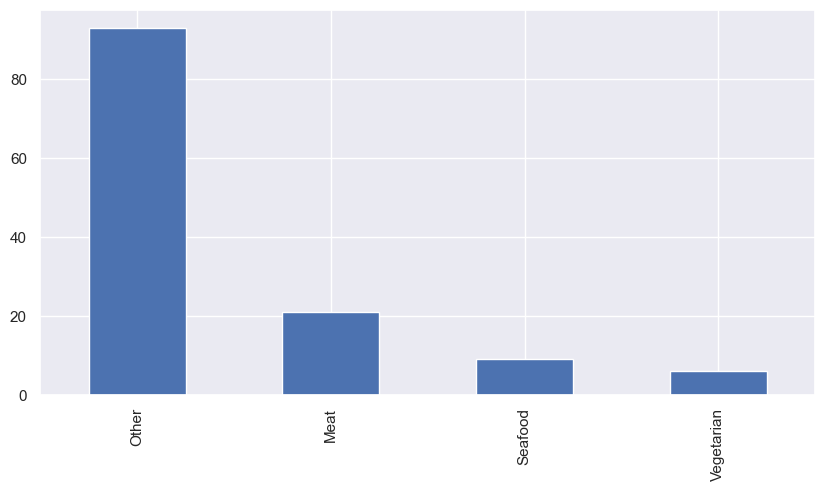

In [11]:
plt.figure(figsize=(10,5))
df['variant'].value_counts().plot(kind='bar')

# 2.0 Análise exploratória dos dados

In [ ]:
# lista de categorical variables to plot
cat_vars = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.ravel()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price_rupiah', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()